<a href="https://colab.research.google.com/github/navidyamini/TensorFlow2.0_Codes/blob/main/code/TF2_0_LSTM_Nonlinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# make the original data
series = np.sin((0.1*np.arange(400))**2)

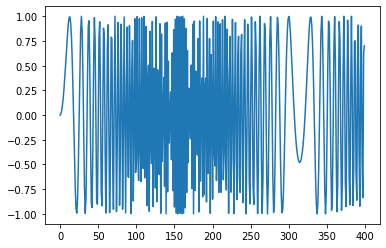

In [4]:
# plot it
plt.plot(series)
plt.show()

In [6]:
# build the dataset
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T) # make it N x T
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (390, 10) Y.shape (390,)


In [9]:
### try autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.01),
)

# train the RNN
r = model.fit(
    X[:-N//2], Y[:N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/80
7/7 [==============================] - 1s 31ms/step - loss: 1.2399 - val_loss: 1.0317
Epoch 2/80
7/7 [==============================] - 0s 9ms/step - loss: 1.0632 - val_loss: 0.8827
Epoch 3/80
7/7 [==============================] - 0s 8ms/step - loss: 0.9327 - val_loss: 0.7821
Epoch 4/80
7/7 [==============================] - 0s 7ms/step - loss: 0.8283 - val_loss: 0.6902
Epoch 5/80
7/7 [==============================] - 0s 8ms/step - loss: 0.7482 - val_loss: 0.6250
Epoch 6/80
7/7 [==============================] - 0s 7ms/step - loss: 0.6847 - val_loss: 0.5800
Epoch 7/80
7/7 [==============================] - 0s 10ms/step - loss: 0.6298 - val_loss: 0.5557
Epoch 8/80
7/7 [==============================] - 0s 9ms/step - loss: 0.5931 - val_loss: 0.5353
Epoch 9/80
7/7 [==============================] - 0s 8ms/step - loss: 0.5664 - val_loss: 0.5238
Epoch 10/80
7/7 [==============================] - 0s 9ms/step - loss: 0.5469 - val_loss: 0.5199
Epoch 11/80
7/7 [====================

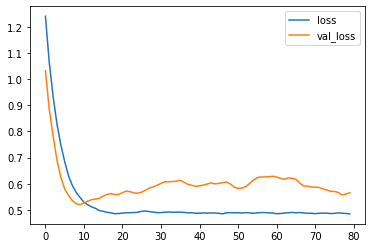

In [10]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

13/13 [==============================] - 0s 2ms/step
(390, 1)


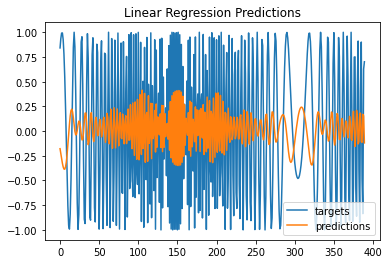

In [11]:
# One-step forcast using true targets
# Note: even the one-steo forecast fails badly
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("Linear Regression Predictions")
plt.legend()
plt.show()

1/1 [==============================] - 0s 18ms/step


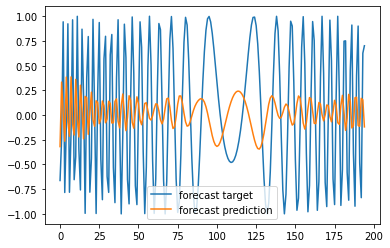

In [13]:
# This is the code we had before - it does the same thing

# One-step forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0,0] # 1x1 arrat -> scalar
  i += 1

  # update the predctions list
  validation_predictions.append(p)

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

1/1 [==============================] - 0s 19ms/step


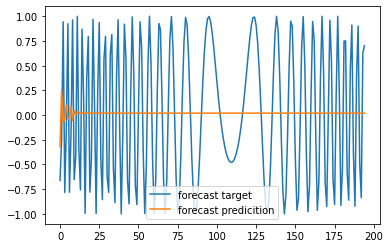

In [14]:
# Multi-step forecast
validation_target = Y[-N//2:]
validation_predictions = []

# last train inout
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar

  # update the prediction list
  validation_predictions.append(p)

  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label ='forecast target')
plt.plot(validation_predictions, label='forecast predicition')
plt.legend()

In [23]:
### Now try RNN/LSTM model
X = X.reshape(-1, T, 1) # make it N x T x D

# make the RNN
i = Input(shape=(T, D))
# x = SimpleRNN(10)(i)
x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.05),
)

# train the RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    batch_size=32,
    epochs=200,
    validation_data = (X[-N//2:], Y[-N//2:]),
)


Epoch 1/200


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


7/7 [==============================] - 3s 90ms/step - loss: 0.5406 - val_loss: 0.5655
Epoch 2/200
7/7 [==============================] - 0s 12ms/step - loss: 0.4962 - val_loss: 0.5481
Epoch 3/200
7/7 [==============================] - 0s 12ms/step - loss: 0.4533 - val_loss: 0.5729
Epoch 4/200
7/7 [==============================] - 0s 10ms/step - loss: 0.3984 - val_loss: 0.4440
Epoch 5/200
7/7 [==============================] - 0s 11ms/step - loss: 0.3049 - val_loss: 0.3469
Epoch 6/200
7/7 [==============================] - 0s 11ms/step - loss: 0.2169 - val_loss: 0.4000
Epoch 7/200
7/7 [==============================] - 0s 12ms/step - loss: 0.1619 - val_loss: 0.2273
Epoch 8/200
7/7 [==============================] - 0s 12ms/step - loss: 0.0909 - val_loss: 0.2295
Epoch 9/200
7/7 [==============================] - 0s 12ms/step - loss: 0.0591 - val_loss: 0.1644
Epoch 10/200
7/7 [==============================] - 0s 12ms/step - loss: 0.0441 - val_loss: 0.1453
Epoch 11/200
7/7 [=============

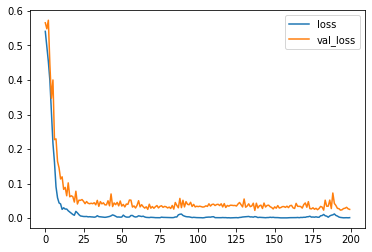

In [24]:
# plt some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

13/13 [==============================] - 0s 3ms/step
(390, 1)


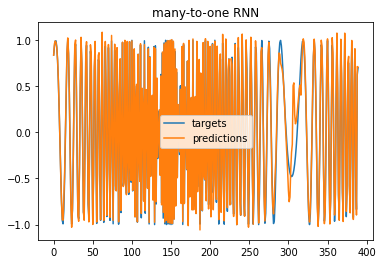

In [25]:
# Open-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("many-to-one RNN")
plt.legend()
plt.show()

1/1 [==============================] - 0s 18ms/step


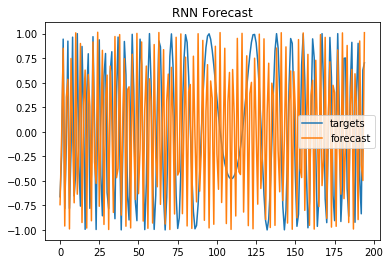

In [26]:
# Multi-step forecast
forecast = []
input_ = X[-N//2]
while len(forecast) < len(Y[-N//2:]):
  # Reshape the input_ to N x T x D
  f = model.predict(input_.reshape(1, T, 1))[0,0]
  forecast.append(f)

  # make a new input with the lastest forecast
  input_ = np.roll(input_, -1)
  input_[-1] = f

plt.plot(Y[-N//2:], label='targets')
plt.plot(forecast, label='forecast')
plt.title("RNN Forecast")
plt.legend()
plt.show()